In [27]:
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['contour.negative_linestyle'] = 'solid'

import time

from sklearn import svm
from sklearn.datasets import make_moons, make_blobs

**-------------------------------------分割线-------------------------------------------**

In [28]:
# example setting
n_samples = 300
outliers_fraction = 0.15
n_outliers = int(n_samples * outliers_fraction)
n_inliers = n_samples - n_outliers

blobs_params = dict(random_state = 13192, n_samples = n_inliers, n_features = 2)
X = make_blobs(centers=[[2,2], [-2,-2]], cluster_std=[1.5,0.3], **blobs_params)[0]


clf = svm.OneClassSVM(nu=outliers_fraction, kernel = 'rbf', gamma = 0.1)

In [29]:
X.shape

(255, 2)

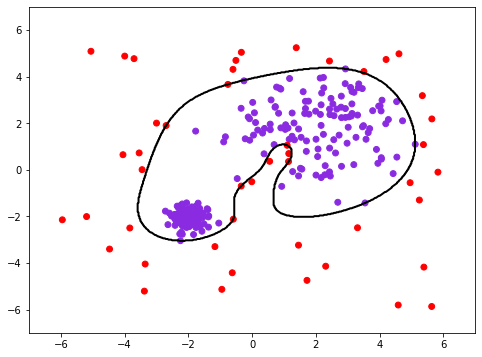

In [66]:

plt.figure(figsize=(8,6))

xx, yy = np.meshgrid(np.linspace(-7,7,500), np.linspace(-7,7,500))

rng = np.random.RandomState(13192)
X1 = np.concatenate([X, rng.uniform(low=-6, high=6, size = (n_outliers, 2))], axis = 0)

clf.fit(X1)
y_pred = clf.predict(X1)

# contour
Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy , Z, levels = [0], linewidths = 2, colors = 'black')

colors = np.array(['red', 'blueviolet'])
plt.scatter(X1[:,0], X1[:,1], s=35, color = colors[(y_pred + 1) // 2])

plt.xlim(-7, 7)
plt.ylim(-7, 7)
plt.show()

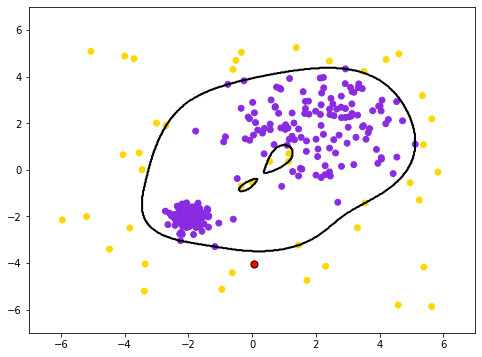

In [98]:
plt.figure(figsize=(8,6))

xx, yy = np.meshgrid(np.linspace(-7,7,500), np.linspace(-7,7,500))

new_outlier = rng.uniform(low=-6, high=6, size = (1, 2))

X2 = np.concatenate([X1, new_outlier], axis = 0)

clf.fit(X2)
y_pred = clf.predict(X2)

# contour
Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy , Z, levels = [0], linewidths = 2, colors = 'black')

colors = np.array(['gold', 'blueviolet'])
plt.scatter(X2[:,0], X2[:,1], s=35, color = colors[(y_pred + 1) // 2])
plt.scatter(new_outlier[:,0], new_outlier[:,1],s=50, color = 'red', edgecolor = 'k')



plt.xlim(-7, 7)
plt.ylim(-7, 7)
plt.show()